In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iga = pd.read_csv('1. Cleaned Data/IGA.csv').fillna('')
coles = pd.read_csv('1. Cleaned Data/Coles.csv').fillna('')
wow = pd.read_csv('1. Cleaned Data/Woolworths.csv').fillna('')
aldi = pd.read_csv('1. Cleaned Data/Aldi.csv').fillna('')

# Total Number of Products Stocked (No Duplicates from different categories)

_N.B. - Woolworths and Coles have duplicate items in different categories_

In [3]:
print(f"IGA: {len(iga.SKU.unique())}")
print(f"Coles: {len(coles.SKU.unique())}")
print(f"Woolworths: {len(wow.SKU.unique())}")
print(f"Aldi: {len(aldi['Product Name'].unique())}")

IGA: 1787
Coles: 20826
Woolworths: 22338
Aldi: 557


# Product Category Segementation

#### Categories of each supermarket
* Modifications to category names have already been applied to some categories from prior dataset scrubbing

### IGA Categories

In [4]:
for cat in sorted(iga['IGA Category'].unique()): print(cat)

Baby
Bakery
Dairy Eggs & Fridge
Drinks
Frozen
Fruit & Veg
Grocery Packs
Health And Beauty
Household
Meat
Other
Pantry
Pet


### Coles Categories

In [5]:
for cat in sorted(coles['COL Category'].unique()): print(cat)

Baby
Bakery
Convenience Meals
Dairy Eggs Meals
Drinks
Entertaining At Home
From Deli
Frozen
Fruit Vegetables
Health Beauty
Household
International Foods
Kids Lunch Box
Meat Seafood Deli
Mothers Day
Pantry
Pet


### Woolworths Categories

In [6]:
for cat in sorted(wow['WOW Category'].unique()): print(cat)

Baby
Bakery
Dairy Eggs & Fridge
Drinks
Freezer
Fruit & Veg
Health & Beauty
Household
Lunch Box
Meat Seafood & Deli
NOT LISTED
Pantry
Pet


### Aldi Categories

In [7]:
for cat in sorted(aldi['Aldi Category'].unique()): print(cat)

Baby
Fresh Produce
Frozen
Health & Beauty
Household
Liquor
Pantry
Special Buys Liquor
Special Buys Sat 1 May
Special Buys Sat 24 April
Special Buys Wed 28 April
Super Savers


* Create dataframe for total count of each category
* Create another dataframe for category as a % of total products
* Concatentate all of them together to plot a bar chart

## Modifying similar Category Names to be consistent across all 3 supermarkets (Woolworths, Coles and IGA)

In [8]:
iga['IGA Category'] = iga['IGA Category'].apply(lambda x: x.replace('And', '&').replace('Meat', 'Meat Seafood & Deli'))

In [9]:
iga_category_count = iga['IGA Category'].value_counts()

iga_category_perc = iga['IGA Category'].value_counts(normalize=True)*100

In [10]:
wow['WOW Category'] = wow['WOW Category'].apply(lambda x: 'Frozen' if x == 'Freezer' else x)

In [11]:
wow_category_count = wow['WOW Category'].value_counts()

wow_category_perc = wow['WOW Category'].value_counts(normalize=True)*100

In [12]:
coles['COL Category'] = coles['COL Category'].apply(
    lambda x: x.replace('Kids', '').strip().replace('Dairy Eggs Meals', 'Dairy Eggs & Fridge')
    .replace('Fruit Vegetables', 'Fruit & Veg').replace('Meat Seafood Deli', 'Meat Seafood & Deli')
    .replace('Health Beauty', 'Health & Beauty')
)

In [13]:
coles_category_count = coles['COL Category'].value_counts()

coles_category_perc = coles['COL Category'].value_counts(normalize=True)*100


In [14]:
# Concatenate all the Category counts/perc counts

category_count_comparison = pd.concat([coles_category_count, wow_category_count, iga_category_count], axis=1, keys=('Coles', 'Woolworths', 'IGA')).fillna(0).astype(int)

category_count_perc = pd.concat([coles_category_perc, wow_category_perc, iga_category_perc], axis=1, keys=('Coles', 'Woolworths', 'IGA')).fillna(0).round(2)

## **Total items by Category**

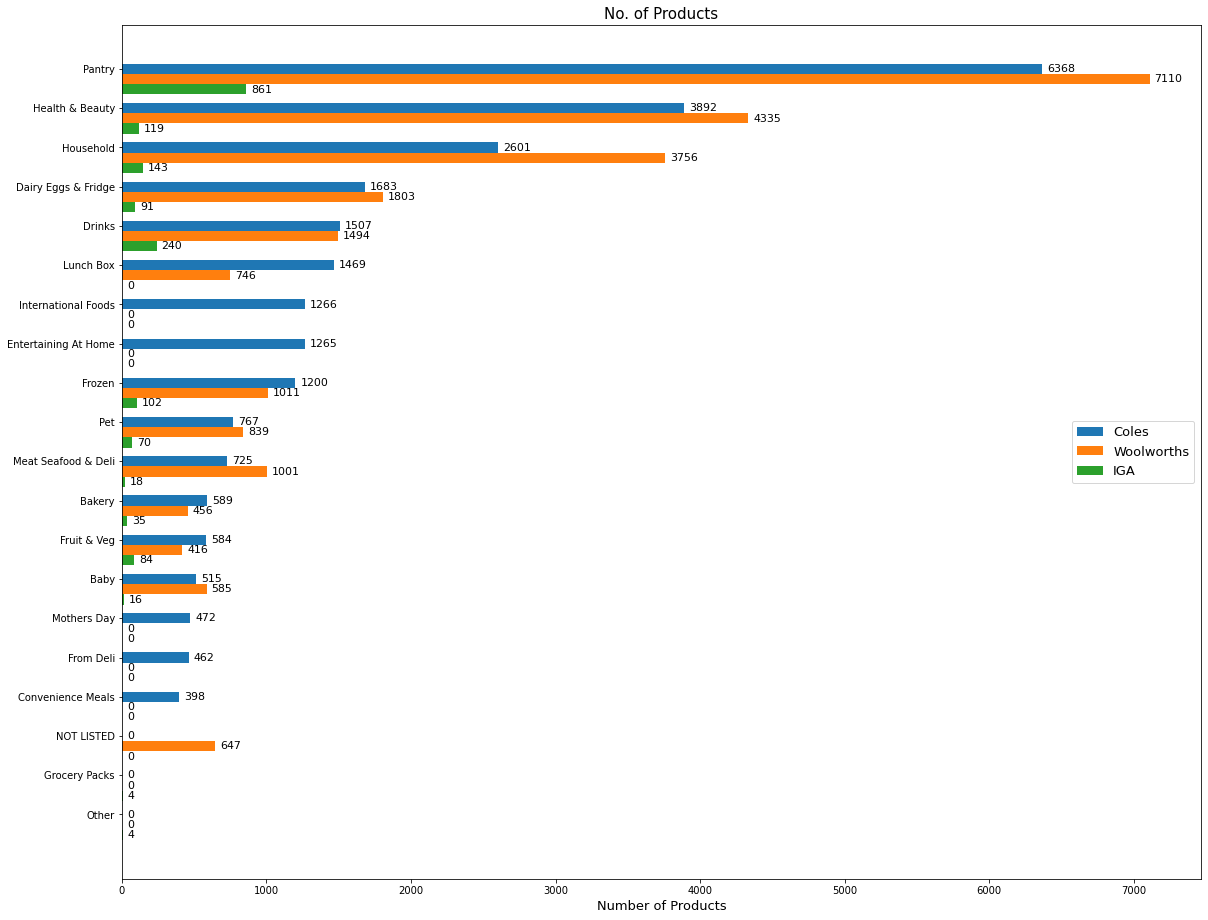

In [15]:
fig, ax = plt.subplots(figsize=(17, 13))

y = np.arange(len(category_count_comparison))
width = 0.26

bar_coles = ax.barh(y, category_count_comparison.Coles, width, label='Coles')
bar_wow = ax.barh(y+width, category_count_comparison.Woolworths, width, label='Woolworths')
bar_iga = ax.barh(y+2*width, category_count_comparison.IGA, width, label='IGA')

ax.set_xlabel('Number of Products', fontsize=13)
ax.set_yticks(y)
ax.set_yticklabels(category_count_comparison.index)
ax.legend()
ax.bar_label(bar_coles, padding=5, fontsize=11)
ax.bar_label(bar_wow, padding=5, fontsize=11)
ax.bar_label(bar_iga, padding=5, fontsize=11)

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.legend(loc='right', fontsize=13)
plt.title('No. of Products', fontsize=15)
plt.gca().invert_yaxis()
plt.style.use('fivethirtyeight')
plt.tight_layout()

In [16]:
print(category_count_comparison)

                      Coles  Woolworths  IGA
Pantry                 6368        7110  861
Health & Beauty        3892        4335  119
Household              2601        3756  143
Dairy Eggs & Fridge    1683        1803   91
Drinks                 1507        1494  240
Lunch Box              1469         746    0
International Foods    1266           0    0
Entertaining At Home   1265           0    0
Frozen                 1200        1011  102
Pet                     767         839   70
Meat Seafood & Deli     725        1001   18
Bakery                  589         456   35
Fruit & Veg             584         416   84
Baby                    515         585   16
Mothers Day             472           0    0
From Deli               462           0    0
Convenience Meals       398           0    0
NOT LISTED                0         647    0
Grocery Packs             0           0    4
Other                     0           0    4


## **Category as a % of total items**

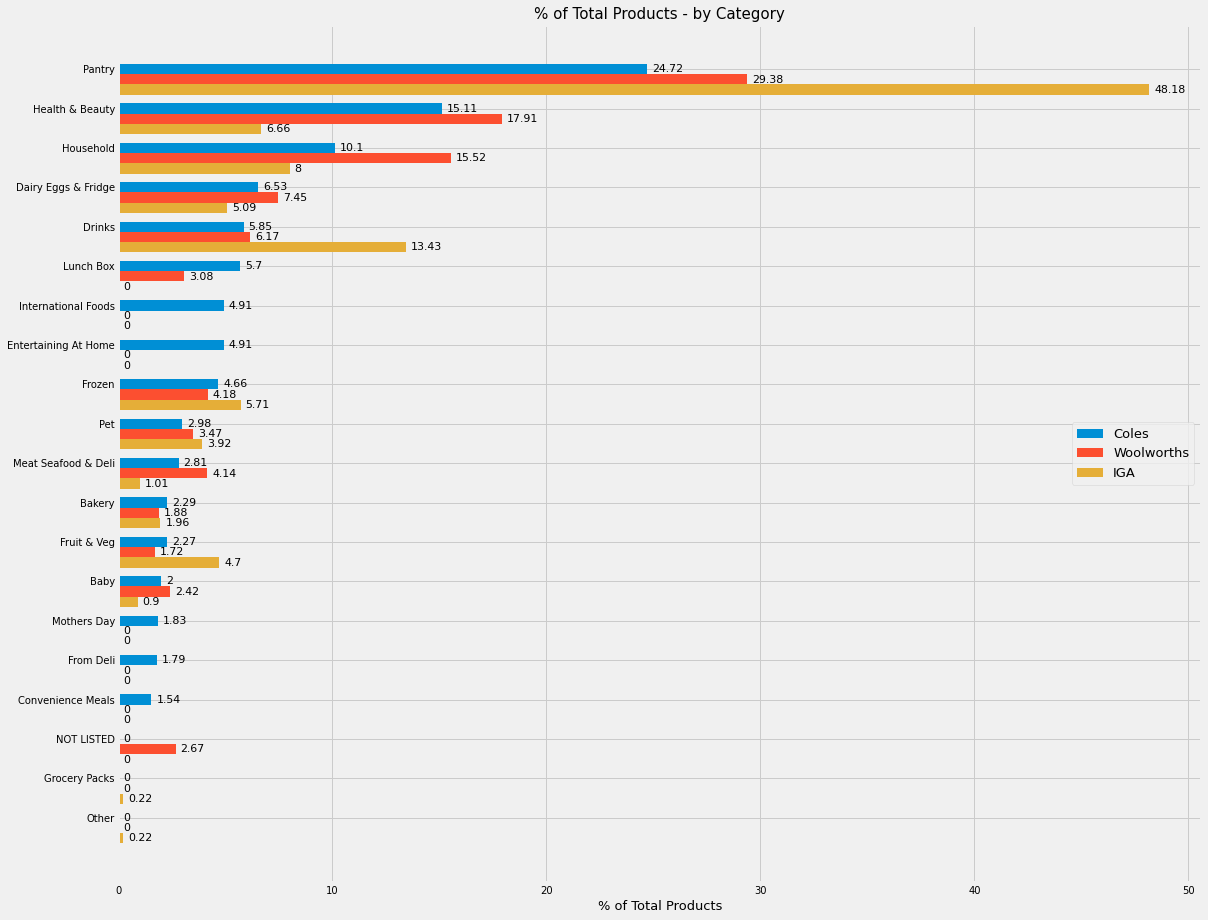

In [17]:
fig, ax = plt.subplots(figsize=(17, 13))

y = np.arange(len(category_count_perc))
width = 0.26

bar_coles = ax.barh(y, category_count_perc.Coles, width, label='Coles')
bar_wow = ax.barh(y+width, category_count_perc.Woolworths, width, label='Woolworths')
bar_iga = ax.barh(y+2*width, category_count_perc.IGA, width, label='IGA')

ax.set_xlabel('% of Total Products', fontsize=13)
ax.set_yticks(y)
ax.set_yticklabels(category_count_perc.index)
ax.legend()
ax.bar_label(bar_coles, padding=5, fontsize=11)
ax.bar_label(bar_wow, padding=5, fontsize=11)
ax.bar_label(bar_iga, padding=5, fontsize=11)


plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.legend(loc='right', fontsize=13)
plt.title('% of Total Products - by Category', fontsize=15)
plt.gca().invert_yaxis()
plt.style.use('fivethirtyeight')
plt.tight_layout()

In [18]:
print(category_count_perc)

                      Coles  Woolworths    IGA
Pantry                24.72       29.38  48.18
Health & Beauty       15.11       17.91   6.66
Household             10.10       15.52   8.00
Dairy Eggs & Fridge    6.53        7.45   5.09
Drinks                 5.85        6.17  13.43
Lunch Box              5.70        3.08   0.00
International Foods    4.91        0.00   0.00
Entertaining At Home   4.91        0.00   0.00
Frozen                 4.66        4.18   5.71
Pet                    2.98        3.47   3.92
Meat Seafood & Deli    2.81        4.14   1.01
Bakery                 2.29        1.88   1.96
Fruit & Veg            2.27        1.72   4.70
Baby                   2.00        2.42   0.90
Mothers Day            1.83        0.00   0.00
From Deli              1.79        0.00   0.00
Convenience Meals      1.54        0.00   0.00
NOT LISTED             0.00        2.67   0.00
Grocery Packs          0.00        0.00   0.22
Other                  0.00        0.00   0.22


# Can we clean up or reduce some of these "odd-one-out" categories?
##### E.g. International Foods, Entertaining At Home, Lunch Box etc.

##### Most of these items are duplicated in other "real" (core) categories, mostly in Pantry

## Coles

#### Finding and removing duplicates from odd categories from Coles

In [19]:
# List of items with duplicated SKUs from Coles

coles_duplicates = coles[coles['SKU'].duplicated(keep=False)].sort_values('SKU')
coles_duplicates.head()

,SKU,Brand_Product_Size,Brand,Product Name,COL Price,COL ppu,COL Size,COL Specials,COL Category,Product URL
12801,1000301P,Real Foods Tasty Cheese Corn Thins 125g,Real Foods,Tasty Cheese Corn Thins,2.00,$1.60 per 100G,125g,,Entertaining At Home,https://shop.coles.com.au/a/national/product/r...
14972,1000301P,Real Foods Tasty Cheese Corn Thins 125g,Real Foods,Tasty Cheese Corn Thins,2.00,$1.60 per 100G,125g,,Pantry,https://shop.coles.com.au/a/national/product/r...
23454,1001461P,Coles RSPCA Approved Chicken Wings Honey & Soy...,Coles,RSPCA Approved Chicken Wings Honey & Soy,7.00,$7.00 per 1Kg,1kg,Specials,Mothers Day,https://shop.coles.com.au/a/national/product/c...
1785,1001461P,Coles RSPCA Approved Chicken Wings Honey & Soy...,Coles,RSPCA Approved Chicken Wings Honey & Soy,7.00,$7.00 per 1Kg,1kg,Specials,Meat Seafood & Deli,https://shop.coles.com.au/a/national/product/c...
7467,1013471P,Coles Strawberry Yoghurt Pouch 70g,Coles,Strawberry Yoghurt Pouch,0.75,$1.07 per 100G,70g,,Dairy Eggs & Fridge,https://shop.coles.com.au/a/national/product/c...


In [20]:
# The above list of items which are in the "odd" categories - which we intend on removing

coles_dupes_in_random_categories = coles_duplicates.loc[
    coles_duplicates['SKU'].isin(coles_duplicates['SKU'].value_counts().index) &
    coles_duplicates['COL Category'].isin(['Entertaining At Home', 'Mothers Day', 'International Foods', 'Lunch Box', 'From Deli', 'Convenience Meals'])
]

coles_dupes_in_random_categories.head()

,SKU,Brand_Product_Size,Brand,Product Name,COL Price,COL ppu,COL Size,COL Specials,COL Category,Product URL
12801,1000301P,Real Foods Tasty Cheese Corn Thins 125g,Real Foods,Tasty Cheese Corn Thins,2.00,$1.60 per 100G,125g,,Entertaining At Home,https://shop.coles.com.au/a/national/product/r...
23454,1001461P,Coles RSPCA Approved Chicken Wings Honey & Soy...,Coles,RSPCA Approved Chicken Wings Honey & Soy,7.00,$7.00 per 1Kg,1kg,Specials,Mothers Day,https://shop.coles.com.au/a/national/product/c...
23780,1013471P,Coles Strawberry Yoghurt Pouch 70g,Coles,Strawberry Yoghurt Pouch,0.75,$1.07 per 100G,70g,,Lunch Box,https://shop.coles.com.au/a/national/product/c...
9849,1013493P,Coles Banana Yoghurt Pouch 70g,Coles,Banana Yoghurt Pouch,0.75,$1.07 per 100G,70g,,Lunch Box,https://shop.coles.com.au/a/national/product/c...
15598,1013675P,Coles Vanilla Yoghurt Pouch 70g,Coles,Vanilla Yoghurt Pouch,0.75,$1.07 per 100G,70g,,Lunch Box,https://shop.coles.com.au/a/national/product/c...


In [21]:
# Create a new dataframe for Coles which have all of the 'odd' category duplicates removed. Outputting the length of list for sanity check

coles_no_dupes_in_odd_categories = pd.merge(coles, coles_dupes_in_random_categories, how='outer', indicator=True).query('_merge == "left_only"').drop('_merge', axis=1)
len(coles_no_dupes_in_odd_categories)

21572

In [22]:
# Outputting a CSV file of the items which are in the 'odd' categories but are not found in other categories - look through the list for insights

coles_no_dupes_in_odd_categories[
    coles_no_dupes_in_odd_categories['COL Category'] == 'International Foods'
].reset_index(drop=True).to_csv('Output Dumps/Coles International Foods Not in Other Categories.csv', index=False)

Scanning through the almost 950 items from the output above, it is pretty evident that:

* Almost __all__ of the products in the International Foods category, which were not already duplicates in other categories at Coles, can be re-classified as Pantry.
* A very small number (approx. 40) of those products can be re-classified to the Drinks section e.g.:
    * 2656422P Fresh Up Apple & Orange Juice Can 355ml
    * 7477941P Kedem Concord Grape Juice 946ml
    * 2404747P Vimto Fizzy Soft Drink Can 330ml
    * 2132137P Frooti Mango Drink 500ml
    * 7223830P Dr Pepper Soft Drink Can 330ml

## Consolidating items from odd categories into other core categories

### Re-categorising items in International Foods

Most of the items would be more accurately categorised as Pantry (International should be a subcategory there).

The items with 'Drinks' or 'Juice' in the product name will be moved to the Drinks category.

In [23]:
# Output International items which are drinks - eyball check to see if it's all the correct ones.

filter = ((coles_no_dupes_in_odd_categories['COL Category'] == 'International Foods') &
         (coles_no_dupes_in_odd_categories['Product Name'].str.contains('Drink') | coles_no_dupes_in_odd_categories['Product Name'].str.contains('Juice')))

coles_no_dupes_in_odd_categories.loc[filter].to_csv('Output Dumps/Coles International - Drinks.csv', index=False)

In [24]:
# Re-categorise beverages i.e. items with 'Drinks' or 'Juice' in their product name to Drinks
# Re-categorise the remaining products to Pantry - effectively removing the International category

coles_no_dupes_in_odd_categories.loc[filter, 'COL Category'] = 'Drinks'

coles_no_dupes_in_odd_categories.loc[coles_no_dupes_in_odd_categories['COL Category'] == 'International Foods', 'COL Category'] = 'Pantry'

In [25]:
coles_no_dupes_in_odd_categories.loc[
    coles_no_dupes_in_odd_categories['COL Category'].isin(['From Deli', 'Lunch Box', 'Convenience Meals', 'Entertaining At Home'])
].sort_values('COL Category').to_csv('Output Dumps/Coles Remaining odd category items.csv', index=False)

<br>

### Re-categorising items in Entertaining At Home

Apart from a few items which are meats (some sorted of exotic/foreign packaged sausages), everything else belongs in Household.

Sausages/meats will be moved to the Meat Seafood & Deli category. The remaining will be moved to Household.

In [26]:
# Re-categorising the items in Entertaining At Home

move_to_meat_seafood_deli_list = ['Smokey Bacon & Cheese Sausages', 'Beef Eater BBQ Sausages', 'Beef Bacon & Cheddar Sausages Bag', 
                                  'Lincolnshire Sausage Bag', 'Pork Cumberland Sausage Bag', 'Thin Pork Sausages Bag']

coles_no_dupes_in_odd_categories.loc[coles_no_dupes_in_odd_categories['Product Name'].isin(move_to_meat_seafood_deli_list), 'COL Category'] = 'Meat Seafood & Deli'

coles_no_dupes_in_odd_categories.loc[coles_no_dupes_in_odd_categories['COL Category'] == 'Entertaining At Home', 'COL Category'] = 'Household'

<br>

### Re-categorising items in Lunch Box

A few are drink bottles or bags - which probably best belongs in Household.

Most of the items in here are snacks i.e. Pantry items.

In [27]:
move_to_household_list = ['Riverside Drink Bottle 517mL', 'Stainless Steel Bottle Special', 'Bento Bite 6 Compartment Box', 'Back Pack Boys',
                      'Leak Proof Snack Box', 'Consumption Bottle 1L', 'Leak Proof Sandwich Box', 'Back Pack Girls']

coles_no_dupes_in_odd_categories.loc[coles_no_dupes_in_odd_categories['Product Name'].isin(move_to_household_list), 'COL Category'] = 'Household'

coles_no_dupes_in_odd_categories.loc[coles_no_dupes_in_odd_categories['COL Category'] == 'Lunch Box', 'COL Category'] = 'Pantry'

<br>

### Re-categorising Convenience Meals

All of them will be moved to the Frozen category. There is literally a subcategory in there called Convenience Meals.

These 37 items were possibly messed up by some new employee/intern and somehow were not duplicated in a core category.

In [28]:
coles_no_dupes_in_odd_categories.loc[coles_no_dupes_in_odd_categories['COL Category'] == 'Convenience Meals', 'COL Category'] = 'Frozen'

<br>

### Re-categorise all items in From Deli to Meat Seafood & Deli

From Deli --> Meat Seafood & Deli

In [29]:
coles_no_dupes_in_odd_categories.loc[coles_no_dupes_in_odd_categories['COL Category'] == 'From Deli', 'COL Category'] = 'Meat Seafood & Deli'

In [30]:
df_coles_modded = coles_no_dupes_in_odd_categories

<br>

### Check to see if all the odd categories have been eliminated

In [31]:
coles_no_dupes_in_odd_categories['COL Category'].value_counts()

Pantry                 7332
Health & Beauty        3892
Household              2623
Dairy Eggs & Fridge    1683
Drinks                 1547
Frozen                 1237
Meat Seafood & Deli     803
Pet                     767
Bakery                  589
Fruit & Veg             584
Baby                    515
Name: COL Category, dtype: int64

<br></br>

## Woolworths

In [32]:
wow_duplicates = wow[wow['SKU'].duplicated(keep=False)].sort_values('SKU')

wow_dupes_in_lunchbox = wow_duplicates.loc[
    wow_duplicates['SKU'].isin(wow_duplicates['SKU'].value_counts().index) &
    wow_duplicates['WOW Category'].isin(['Lunch Box'])
]

wow_no_dupes_in_lunchbox = pd.merge(wow, wow_dupes_in_lunchbox, how='outer', indicator=True).query('_merge == "left_only"').drop('_merge', axis=1)

In [33]:
wow_no_dupes_in_lunchbox[wow_no_dupes_in_lunchbox['WOW Category']=='Lunch Box']

,SKU,Brand_Product_Size,Brand,Product Name,WOW Price,WOW Size,WOW ppu,WOW Specials,WOW Category,Online Only,New Product,Product URL
1781,365259,V8 Tropical Juice 3x250mL,v8,V8 Tropical Juice,3.0,3x250mL,$4.00 / 1L,,Lunch Box,,,https://www.woolworths.com.au/shop/productdeta...
8114,90001638,Celery And Philly Afternoon Snack Solution Bun...,,Celery And Philly Afternoon Snack Solution Bundle,6.2,,,,Lunch Box,Online Only,,https://www.woolworths.com.au/shop/productdeta...
9035,745467,Woolworths Celery Sticks 300g punnet,woolworths,Woolworths Celery Sticks,4.5,300g punnet,$15.00 / 1KG,,Lunch Box,,,https://www.woolworths.com.au/shop/productdeta...
9178,110704,Carman's Aussie Oat Choc Chip Bars 6 pack,carman's,Carman's Aussie Oat Choc Chip Bars,5.0,6 pack,$2.78 / 100G,,Lunch Box,,,https://www.woolworths.com.au/shop/productdeta...
13227,633876,Woolworths Spring Water Minis 20x250mL,woolworths,Woolworths Spring Water Minis,7.5,20x250mL,$1.50 / 1L,,Lunch Box,,,https://www.woolworths.com.au/shop/productdeta...
13921,700725,Appy Co Tropical Fruit Drink 200mL x3 pack,appy co,Appy Co Tropical Fruit Drink,3.3,200mL x3 pack,$5.50 / 1L,,Lunch Box,,,https://www.woolworths.com.au/shop/productdeta...
16002,115730,Mother Earth Oaty Slices Peach & White Chocola...,mother earth,Mother Earth Oaty Slices Peach & White Chocolate,3.0,6 pack,$1.25 / 100G,,Lunch Box,,,https://www.woolworths.com.au/shop/productdeta...
19567,700751,Appy Co Summer Berries Fruit Drink 200mL x3 pack,appy co,Appy Co Summer Berries Fruit Drink,3.3,200mL x3 pack,$5.50 / 1L,,Lunch Box,,,https://www.woolworths.com.au/shop/productdeta...


### Re-categorising products from Lunch Box into categories that makes more sense

In [34]:
move_to_drinks_list = ['V8 Tropical Juice', 'Woolworths Spring Water Minis', 'Appy Co Tropical Fruit Drink', 'Appy Co Summer Berries Fruit Drink']
wow_no_dupes_in_lunchbox.loc[wow_no_dupes_in_lunchbox['Product Name'].isin(move_to_drinks_list), 'WOW Category'] == 'Drinks'

move_to_veg_list = ['Celery And Philly Afternoon Snack Solution Bundle', 'Woolworths Celery Sticks']
wow_no_dupes_in_lunchbox.loc[wow_no_dupes_in_lunchbox['Product Name'].isin(move_to_veg_list), 'WOW Category'] == 'Fruit & Veg'

wow_no_dupes_in_lunchbox.loc[wow_no_dupes_in_lunchbox['WOW Category'] == 'Lunch Box', 'WOW Category'] = 'Pantry'

In [35]:
df_wow_modded = wow_no_dupes_in_lunchbox

<br></br>

# IGA

The items in Other and Grocery Packs are all just bundles of already existing products from other categories.

Removed.

In [36]:
iga.loc[iga['IGA Category'].isin(['Other', 'Grocery Packs'])]

,SKU,Brand_Product_Size,IGA Price,IGA ppu,IGA Category,Product URL
305,242,Dog Pack,20.0,,Grocery Packs,https://igashop.com.au/product/dog-pack/
307,247,Pantry Plus,150.0,,Grocery Packs,https://igashop.com.au/product/essentials-plus...
308,4151,Dog Pack,20.0,,Other,https://igashop.com.au/product/dog-pack-2/
310,4154,The Essentials,60.0,,Other,https://igashop.com.au/product/the-essentials/
316,4153,Pantry Plus,150.0,,Other,https://igashop.com.au/product/pantry-plus/
325,249,The Essentials,60.0,,Grocery Packs,https://igashop.com.au/product/essentials-pack/
328,244,Cat Pack,20.0,,Grocery Packs,https://igashop.com.au/product/cat-pack/
331,4152,Cat Pack,20.0,,Other,https://igashop.com.au/product/cat-pack-2/


In [37]:
filter = iga['IGA Category'].isin(['Other', 'Grocery Packs'])

df_iga_modded = iga.loc[~filter]

<br></br>

# Woolworths vs Coles vs IGA - Product Category Segmentation Comparison

In [38]:
coles_modded_cat_count = df_coles_modded['COL Category'].value_counts()
wow_modded_cat_count = df_wow_modded['WOW Category'].value_counts()
iga_modded_cat_count = df_iga_modded['IGA Category'].value_counts()

In [39]:
category_count_comparison = pd.concat([coles_modded_cat_count, wow_modded_cat_count, iga_modded_cat_count], axis=1, keys=('Coles', 'Woolworths', 'IGA')).fillna(0).astype(int)

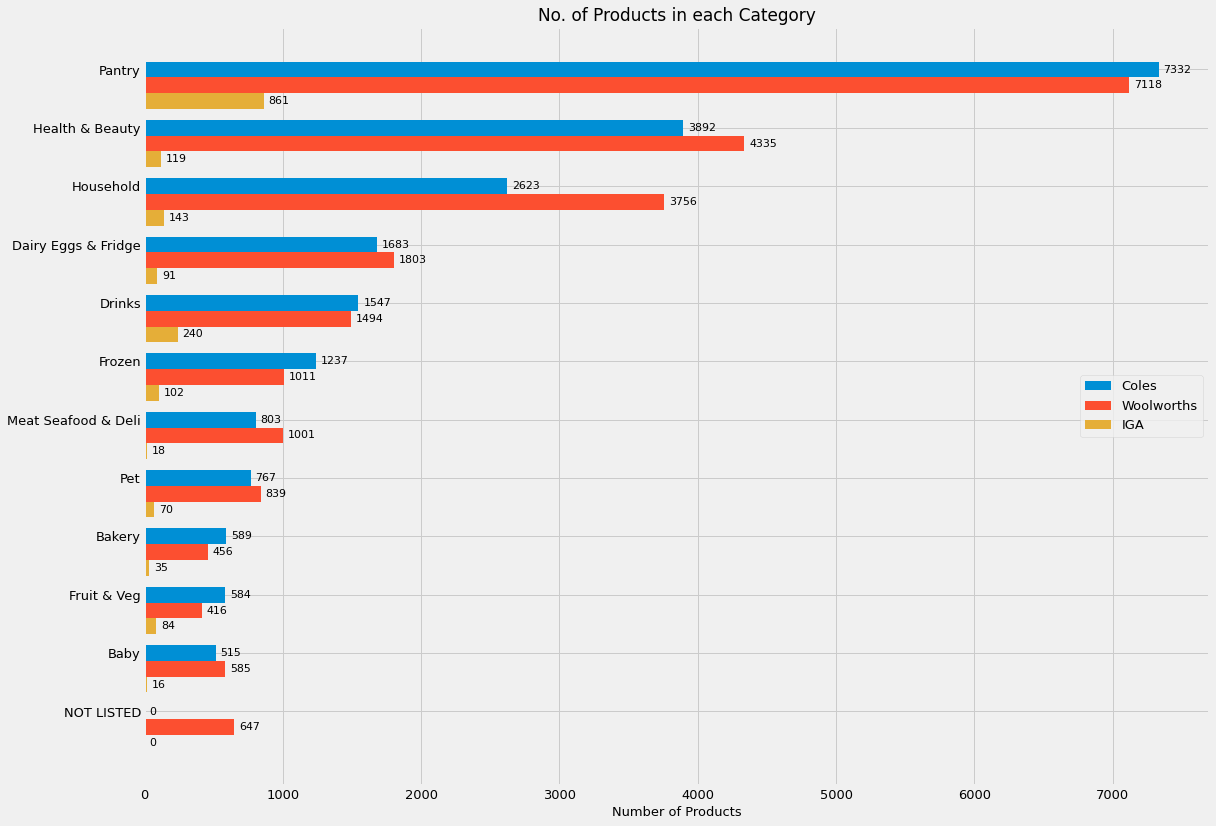

In [40]:
fig, ax = plt.subplots(figsize =(17, 13))

y = np.arange(len(category_count_comparison))
width = 0.27

bar_coles = ax.barh(y, category_count_comparison.Coles, width, label='Coles')
bar_wow = ax.barh(y+width, category_count_comparison.Woolworths, width, label='Woolworths')
bar_iga = ax.barh(y+2*width, category_count_comparison.IGA, width, label='IGA')

ax.set_xlabel('Number of Products', fontsize=13)
ax.set_yticks(y)
ax.set_yticklabels(category_count_comparison.index)
ax.legend()
ax.bar_label(bar_coles, padding=5, fontsize=11)
ax.bar_label(bar_wow, padding=5, fontsize=11)
ax.bar_label(bar_iga, padding=5, fontsize=11)

plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.legend(loc='right', fontsize=13)
plt.title('No. of Products in each Category', fontsize=17)
plt.gca().invert_yaxis()
plt.style.use('fivethirtyeight')

In [41]:
coles_modded_cat_perc = df_coles_modded['COL Category'].value_counts(normalize=True).round(4)*100

wow_modded_cat_perc = df_wow_modded['WOW Category'].value_counts(normalize=True).round(4)*100

iga_modded_cat_perc = df_iga_modded['IGA Category'].value_counts(normalize=True).round(4)*100

category_count_perc = pd.concat([coles_modded_cat_perc, wow_modded_cat_perc, iga_modded_cat_perc], axis=1, keys=('Coles', 'Woolworths', 'IGA')).fillna(0).round(2)

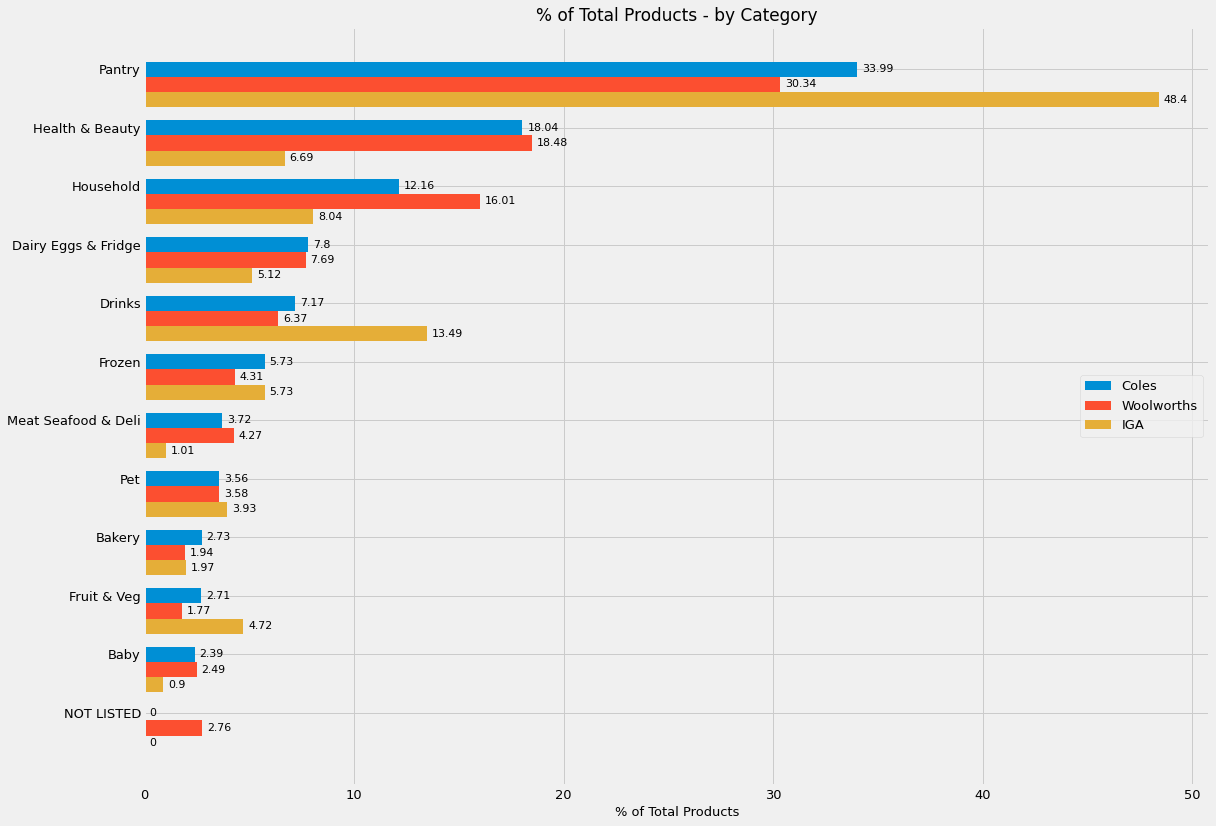

In [42]:
fig, ax = plt.subplots(figsize=(17, 13))

y = np.arange(len(category_count_perc))
width = 0.26

bar_coles = ax.barh(y, category_count_perc.Coles, width, label='Coles')
bar_wow = ax.barh(y+width, category_count_perc.Woolworths, width, label='Woolworths')
bar_iga = ax.barh(y+2*width, category_count_perc.IGA, width, label='IGA')

ax.set_xlabel('% of Total Products', fontsize=13)
ax.set_yticks(y)
ax.set_yticklabels(category_count_perc.index)
ax.legend()
ax.bar_label(bar_coles, padding=5, fontsize=11)
ax.bar_label(bar_wow, padding=5, fontsize=11)
ax.bar_label(bar_iga, padding=5, fontsize=11)


plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.legend(loc='right', fontsize=13)
plt.title('% of Total Products - by Category', fontsize=17)
plt.gca().invert_yaxis()
plt.style.use('fivethirtyeight')

## Woolworths, Coles, IGA and Aldi - Percentage of total products (Tables)

### Woolworths

In [43]:
category_count_perc.Woolworths.sort_values(ascending=False)

Pantry                 30.34
Health & Beauty        18.48
Household              16.01
Dairy Eggs & Fridge     7.69
Drinks                  6.37
Frozen                  4.31
Meat Seafood & Deli     4.27
Pet                     3.58
NOT LISTED              2.76
Baby                    2.49
Bakery                  1.94
Fruit & Veg             1.77
Name: Woolworths, dtype: float64

### Coles

In [44]:
category_count_perc.Coles.sort_values(ascending=False)

Pantry                 33.99
Health & Beauty        18.04
Household              12.16
Dairy Eggs & Fridge     7.80
Drinks                  7.17
Frozen                  5.73
Meat Seafood & Deli     3.72
Pet                     3.56
Bakery                  2.73
Fruit & Veg             2.71
Baby                    2.39
NOT LISTED              0.00
Name: Coles, dtype: float64

### IGA

In [45]:
category_count_perc.IGA.sort_values(ascending=False)

Pantry                 48.40
Drinks                 13.49
Household               8.04
Health & Beauty         6.69
Frozen                  5.73
Dairy Eggs & Fridge     5.12
Fruit & Veg             4.72
Pet                     3.93
Bakery                  1.97
Meat Seafood & Deli     1.01
Baby                    0.90
NOT LISTED              0.00
Name: IGA, dtype: float64

In [46]:
aldi['Aldi Category'].value_counts(normalize=True, ascending=False).round(4)*100

Liquor                       19.15
Pantry                       14.54
Special Buys Wed 28 April    11.17
Health & Beauty              10.28
Fresh Produce                 9.04
Special Buys Sat 24 April     7.80
Special Buys Sat 1 May        6.38
Baby                          4.96
Household                     4.79
Special Buys Liquor           4.61
Super Savers                  4.43
Frozen                        2.84
Name: Aldi Category, dtype: float64

### Output all the modified datasets for Woolworths, Coles and IGA for ~FuzzyWuzzy~ RapidFuzz matching

In [47]:
df_iga_modded.to_csv('2. Modified Data/Modified IGA.csv', index=False)
df_coles_modded.to_csv('2. Modified Data/Modified Coles.csv', index=False)
df_wow_modded.to_csv('2. Modified Data/Modified Woolworths.csv', index=False)

<br>

# Woolworths vs Coles - % of Products on Special

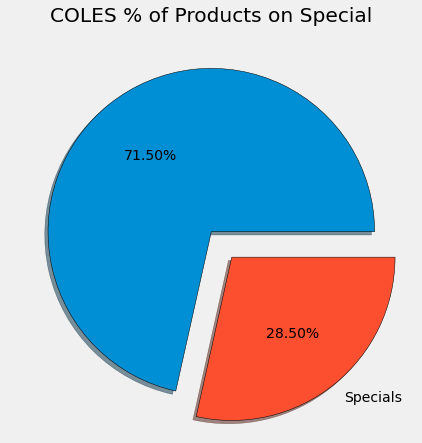

In [48]:
coles_specials = df_coles_modded['COL Specials'].value_counts(normalize=True)

plt.subplots(figsize=(7,7))
explode = [0,0.2]
plt.style.use('fivethirtyeight')
plt.title("COLES % of Products on Special")
coles_piechart = plt.pie(coles_specials, labels=coles_specials.index, shadow=True, autopct='%1.2f%%', explode=explode, wedgeprops={'edgecolor': 'black'})

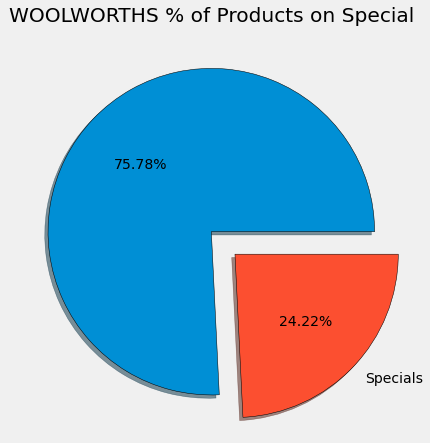

In [49]:
wow_specials = df_wow_modded['WOW Specials'].value_counts(normalize=True)

plt.subplots(figsize=(7,7))
explode = [0,0.2]
plt.style.use('fivethirtyeight')
plt.title("WOOLWORTHS % of Products on Special")
coles_piechart = plt.pie(wow_specials, labels=wow_specials.index, shadow=True, autopct='%1.2f%%', explode=explode, wedgeprops={'edgecolor': 'black'})

In [50]:
coles_spec_cat_perc = df_coles_modded.loc[df_coles_modded['COL Specials'] == 'Specials']['COL Category'].value_counts(normalize=True)*100

In [51]:
wow_spec_cat_perc = df_wow_modded.loc[df_wow_modded['WOW Specials'] == 'Specials']['WOW Category'].value_counts(normalize=True)*100

In [52]:
spec_cat_count_perc = pd.concat([coles_spec_cat_perc, wow_spec_cat_perc], axis=1, keys=('Coles', 'Woolworths')).fillna(0).round(2)

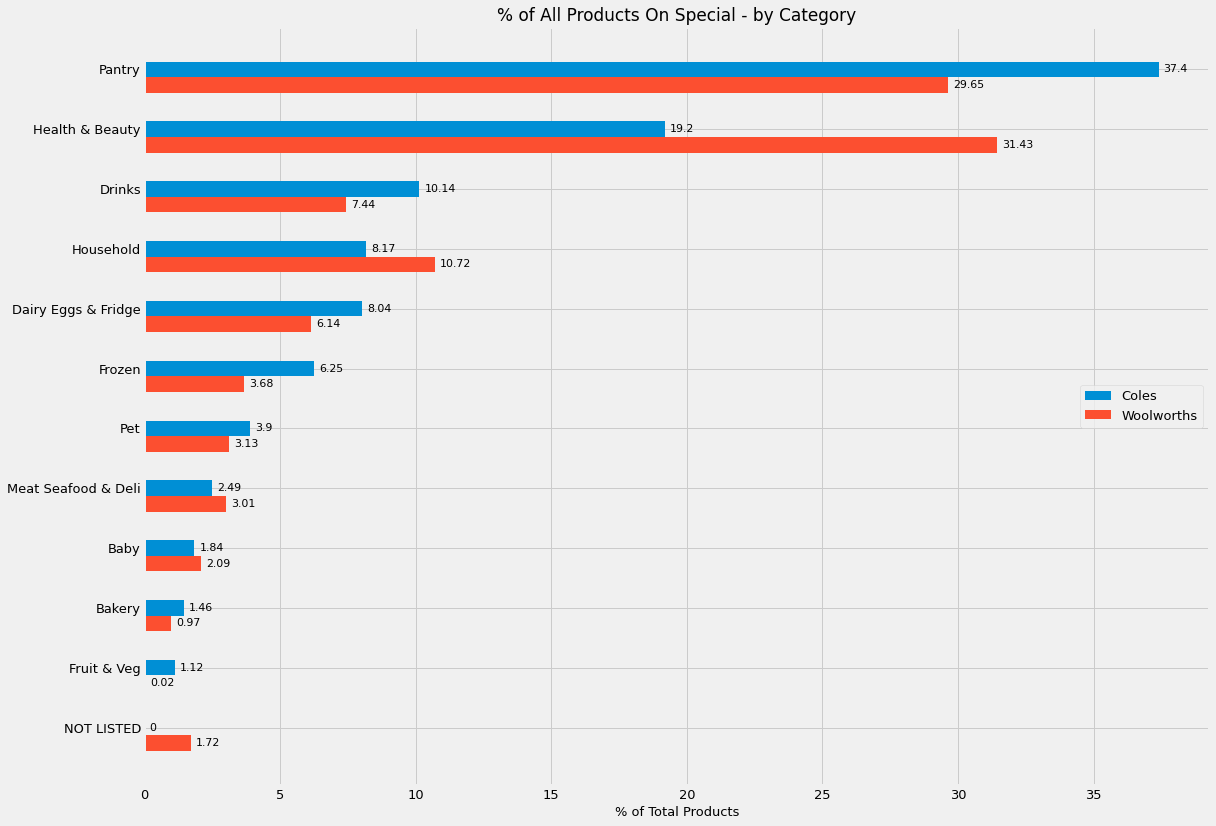

In [53]:
fig, ax = plt.subplots(figsize=(17, 13))

y = np.arange(len(spec_cat_count_perc))
width = 0.26

bar_coles = ax.barh(y, spec_cat_count_perc.Coles, width, label='Coles')
bar_wow = ax.barh(y+width, spec_cat_count_perc.Woolworths, width, label='Woolworths')

ax.set_xlabel('% of Total Products', fontsize=13)
ax.set_yticks(y)
ax.set_yticklabels(spec_cat_count_perc.index)
ax.legend()
ax.bar_label(bar_coles, padding=5, fontsize=11)
ax.bar_label(bar_wow, padding=5, fontsize=11)


plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.legend(loc='right', fontsize=13)
plt.title('% of All Products On Special - by Category', fontsize=17)
plt.gca().invert_yaxis()
plt.style.use('fivethirtyeight')

<br>



</br>

# Private Labels - Coles vs Woolworths

Ever since the entrance of ALDI into the Australian Supermarkets and Grocery Stores industry, it's rapid capture of marketshare driven by ALDI's low-cost private label products, has caused a paradigm shift in the industry dynamic. ALDI's huge success in Australia has forced Woolworths and Coles to cut prices and expand their own private label products in order to remain competitive and stem the marketshare haemorrhage.

According to IBISWorld's Supermarkets and Grocery Stores in Australia Industry report:
* _"Consumer sentiment is anticipated to fall and become negative, and unemployment is expected to increase sharply in 2019-20. Many consumers are anticipated to increasingly opt for cheaper goods, such as private-label brands, as poor consumer sentiment constrains expenditure."_
* _"Industry profitability is projected to increase over the next five years. An anticipated decline in price-based competition, in conjunction with efficiency-boosting strategies from major players, will likely aid margin growth. While private-label goods typically have lower prices than branded alternatives, own-brand products are more profitable for supermarkets. The continued shift towards private-label brands is forecast to support industry margins over the next five years."_

So, what does the private label _pivot_ look like between the two biggest players in this market?

## Coles - % of products which are private label or exclusive products

#### Coles Private Label and Exclusive Brands

* Coles (and anything with that word in it e.g. Coles Finest, Coles Organic)
* Cook & Dine

#### Coles Exclusive Brands

* Wellness Road
* I'm Free From
* Nature's Kitchen
* Wild Tides
* Daley Street
* I'm Perfect
* Slow Hills
* KOi
* Woofin' Good
* Green Choice
* GRAZE beef and lamb
* CUB


Sources: 
* https://www.coles.com.au/about-coles/exclusive-brands
* https://www.colesgroup.com.au/media-releases/?page=quality-kitchenware-sizzles-at-coles

In [54]:
df_coles_modded['Brand'] = df_coles_modded['Brand'].apply(lambda x: "Coles Private Label" if "Coles" in x or "Cook & Dine" in x else x)

coles_exclusive_brands = ["wellness road", "i'm free from", "natures", "wild tides", 
                          "daley street", "i'm perfect", "slow hills", "koi", "woofin good", 
                          "green choice", "graze", "cub"]

df_coles_modded['Brand'] = df_coles_modded['Brand'].apply(lambda x: "Coles Exclusive" if any(item in x.lower() for item in coles_exclusive_brands) else x)

df_coles_modded['Brand'] = df_coles_modded['Brand'].apply(lambda x: "Coles Private Label/Exclusive Brands" if "Coles" in x else x)         

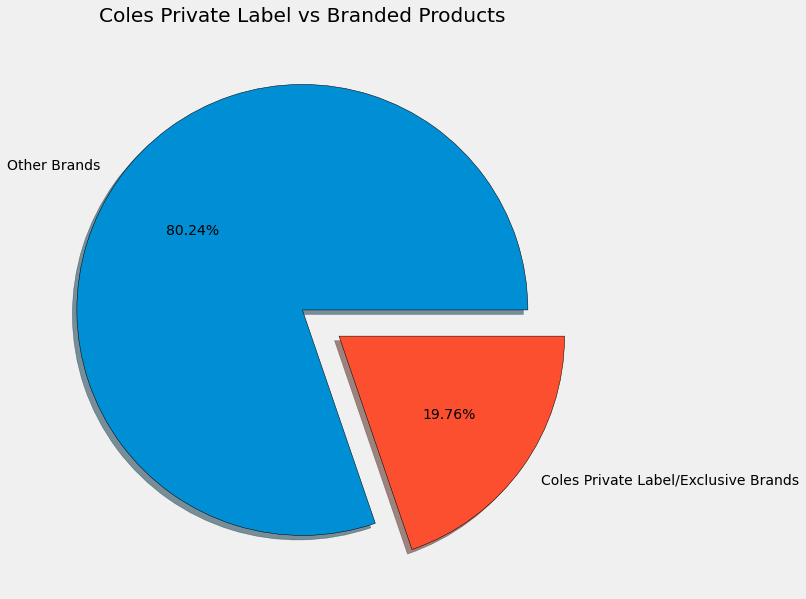

In [55]:
df_colesbrand_otherbrand = df_coles_modded['Brand'].apply(lambda x: "Other Brands" if "Coles" not in x else x)
colesbrand_otherbrands = df_colesbrand_otherbrand.value_counts(normalize=True)

plt.subplots(figsize=(9,11))
explode = [0,0.2]
plt.style.use('fivethirtyeight')
plt.title("Coles Private Label vs Branded Products")
coles_piechart = plt.pie(colesbrand_otherbrands, labels=colesbrand_otherbrands.index, shadow=True, autopct='%1.2f%%', explode=explode, wedgeprops={'edgecolor': 'black'})

#### Top 10 Brands at Coles by product count

In [56]:
df_colesbrand_count = pd.concat([df_coles_modded['Brand'].value_counts(),
                             df_coles_modded['Brand'].value_counts(normalize=True).round(4)*100],
                             axis=1, keys=('Count', 'Percentage'))

df_colesbrand_count.sort_values('Count', ascending=False).head(10)

,Count,Percentage
Coles Private Label/Exclusive Brands,4262,19.76
L'Oreal,222,1.03
MasterFoods,169,0.78
Cadbury,150,0.70
Nivea,140,0.65
Arnott's,122,0.57
Twinings,112,0.52
Nestle,112,0.52
Heinz,111,0.51
Schwarzkopf,106,0.49


## Woolworths - % of products which are private label or exclusive products

#### Woolworths private labels and exclusive brands

* Woolworths (BBQ, Plantitude, Cook, Delicious Nutritious, Free From Gluten)
* Sam's Pantry
* Thomas Dux range
* Farmer's Own Milk
* Macro
* Essentials
* Bunch
* Frey
* Little One's
* Voeu
* Apollo
* Baxters
* Your Majesty
* Smitten
* La Molisana

Source: https://www.woolworths.com.au/shop/discover/our-brands

In [57]:
df_wow_modded['Brand'] = df_wow_modded['Brand'].apply(lambda x: "macro" if "macro" in x else x)
df_wow_modded['Brand'] = df_wow_modded['Brand'].apply(lambda x: "essentials" if "essentials" in x else x)

In [58]:
wow_brands = ["woolworths", "sam's pantry", "thomas dux", "plantitude", "farmers own",
              "macro", "essentials", "frey", "little one's", "voeu", "apollo", "baxter's",
              "your majesty", "smitten", "la molisana"]

df_wow_modded['Brand'] = df_wow_modded['Brand'].apply(lambda x: "Woolworths Brands" if any(item in x.lower() for item in wow_brands) else x)

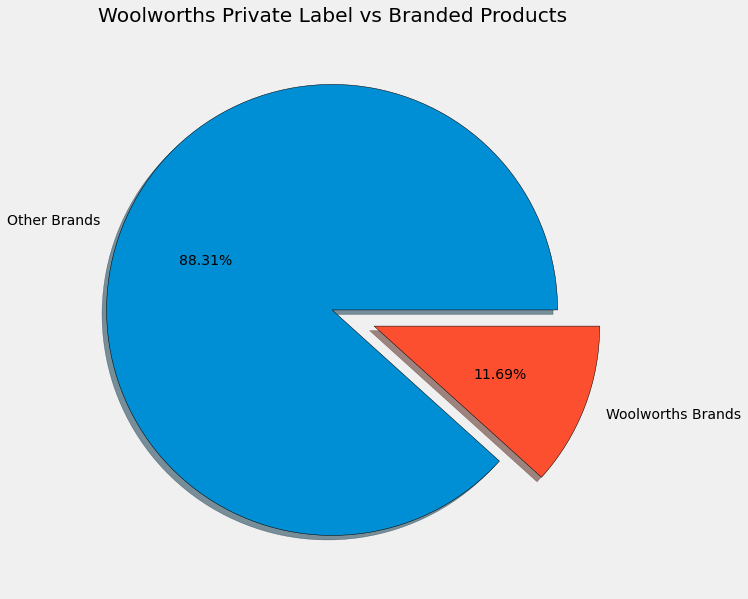

In [59]:
df_wowbrand_otherbrand = df_wow_modded['Brand'].apply(lambda x: "Other Brands" if "Woolworths" not in x else x)
wowbrand_otherbrands = df_wowbrand_otherbrand.value_counts(normalize=True)

plt.subplots(figsize=(9,11))
explode = [0,0.2]
plt.style.use('fivethirtyeight')
plt.title("Woolworths Private Label vs Branded Products")
wow_piechart = plt.pie(wowbrand_otherbrands, labels=wowbrand_otherbrands.index, shadow=True, autopct='%1.2f%%', explode=explode, wedgeprops={'edgecolor': 'black'})

#### Top 10 Brands at Woolworths by product count

In [60]:
df_wowbrand_count = pd.concat([df_wow_modded['Brand'].value_counts(), 
                               df_wow_modded['Brand'].value_counts(normalize=True).round(4)*100], 
                              axis=1, keys=('Count', 'Percentage'))

df_wowbrand_count.sort_values('Count', ascending=False).head(10)

,Count,Percentage
Woolworths Brands,2743,11.69
,554,2.36
bonds,243,1.04
l'oreal,204,0.87
masterfoods,178,0.76
maybelline,159,0.68
heinz,149,0.64
mint,148,0.63
nivea,136,0.58
korbond,135,0.58


## Category Segmentation of Private Label Products

In [61]:
df_colesbrand = df_coles_modded.loc[df_coles_modded['Brand'] == "Coles Private Label/Exclusive Brands"]
colesbrand_segmentation = df_colesbrand['COL Category'].value_counts()

df_wowbrand = df_wow_modded.loc[df_wow_modded['Brand'] == 'Woolworths Brands']
wowbrand_segmentation = df_wowbrand['WOW Category'].value_counts()

private_label_count_comparison = pd.concat([colesbrand_segmentation, wowbrand_segmentation], axis=1, keys=('Coles', 'Woolworths')).fillna(0).round(2)

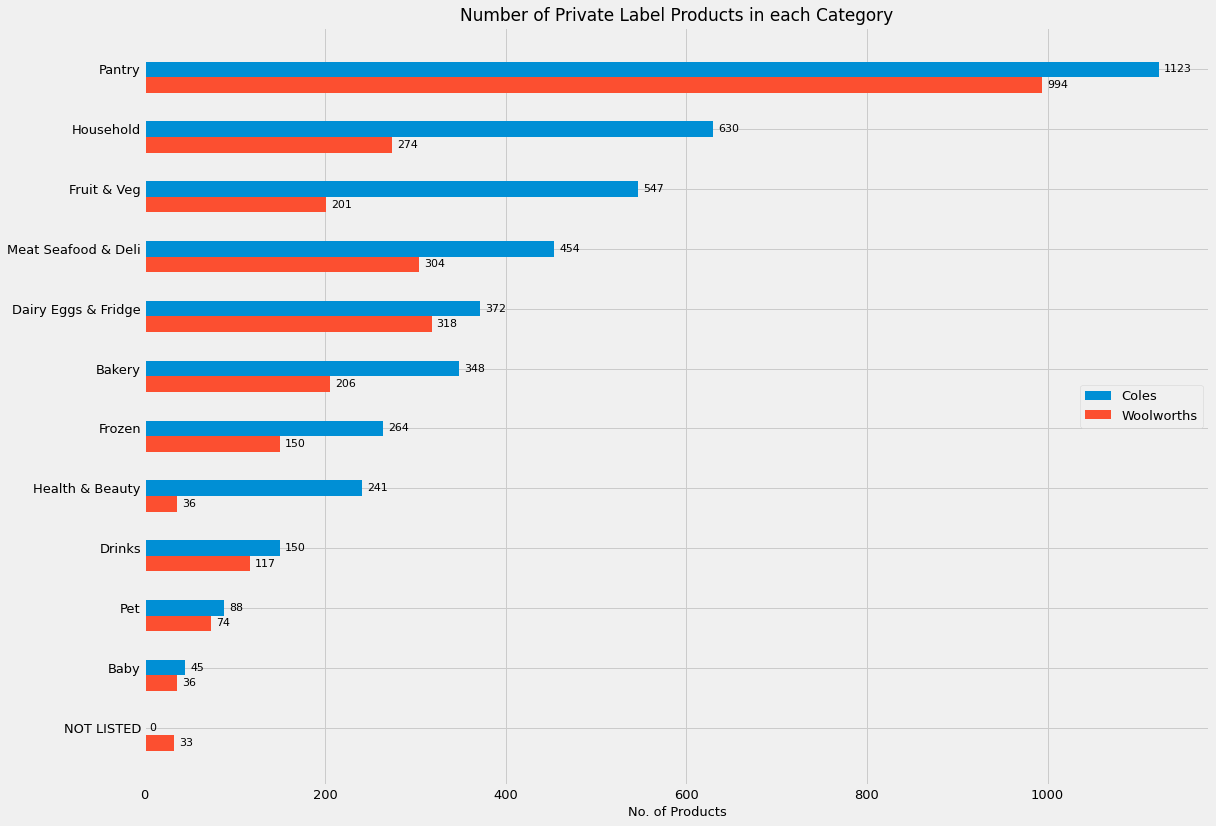

In [69]:
fig, ax = plt.subplots(figsize=(17, 13))

y = np.arange(len(private_label_count_comparison))
width = 0.26

bar_coles = ax.barh(y, private_label_count_comparison.Coles, width, label='Coles')
bar_wow = ax.barh(y+width, private_label_count_comparison.Woolworths, width, label='Woolworths')

ax.set_xlabel('No. of Products', fontsize=13)
ax.set_yticks(y)
ax.set_yticklabels(private_label_count_comparison.index)
ax.legend()
ax.bar_label(bar_coles, padding=5, fontsize=11)
ax.bar_label(bar_wow, padding=5, fontsize=11)


plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.legend(loc='right', fontsize=13)
plt.title('Number of Private Label Products in each Category', fontsize=17)
plt.gca().invert_yaxis()
plt.style.use('fivethirtyeight')

In [63]:
private_label_cat_perc_count = df_colesbrand['COL Category'].value_counts()/category_count_comparison.Coles
private_label_cat_perc_count.sort_values(ascending=False)*100

Fruit & Veg            93.664384
Bakery                 59.083192
Meat Seafood & Deli    56.537983
Household              24.018300
Dairy Eggs & Fridge    22.103387
Frozen                 21.341956
Pantry                 15.316421
Pet                    11.473272
Drinks                  9.696186
Baby                    8.737864
Health & Beauty         6.192189
NOT LISTED                   NaN
dtype: float64

In [64]:
df_colesbrand['COL Category'].value_counts()

Pantry                 1123
Household               630
Fruit & Veg             547
Meat Seafood & Deli     454
Dairy Eggs & Fridge     372
Bakery                  348
Frozen                  264
Health & Beauty         241
Drinks                  150
Pet                      88
Baby                     45
Name: COL Category, dtype: int64

In [65]:
category_count_comparison.Coles

Pantry                 7332
Health & Beauty        3892
Household              2623
Dairy Eggs & Fridge    1683
Drinks                 1547
Frozen                 1237
Meat Seafood & Deli     803
Pet                     767
Bakery                  589
Fruit & Veg             584
Baby                    515
NOT LISTED                0
Name: Coles, dtype: int32

In [66]:
colesbrand_perc = (df_colesbrand['COL Category'].value_counts()/category_count_comparison.Coles*100).sort_values(ascending=False)
wowbrand_perc = (df_wowbrand['WOW Category'].value_counts()/category_count_comparison.Woolworths*100).sort_values(ascending=False)

private_label_perc_comp = pd.concat([colesbrand_perc, wowbrand_perc], axis=1, keys=('Coles', 'Woolworths')).fillna(0).round(2)

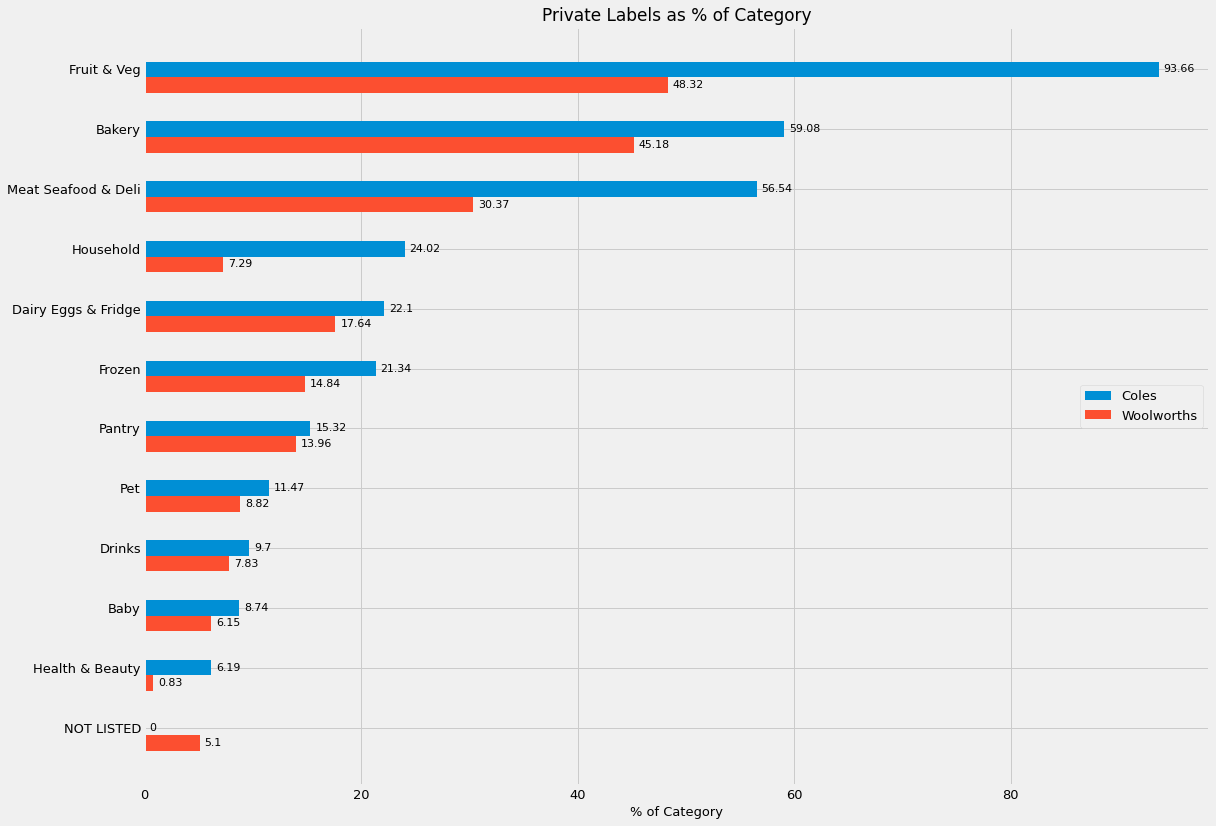

In [67]:
fig, ax = plt.subplots(figsize=(17, 13))

y = np.arange(len(private_label_perc_comp))
width = 0.26

bar_coles = ax.barh(y, private_label_perc_comp.Coles, width, label='Coles')
bar_wow = ax.barh(y+width, private_label_perc_comp.Woolworths, width, label='Woolworths')

ax.set_xlabel('% of Category', fontsize=13)
ax.set_yticks(y)
ax.set_yticklabels(private_label_perc_comp.index)
ax.legend()
ax.bar_label(bar_coles, padding=5, fontsize=11)
ax.bar_label(bar_wow, padding=5, fontsize=11)


plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.legend(loc='right', fontsize=13)
plt.title('Private Labels as % of Category', fontsize=17)
plt.gca().invert_yaxis()
plt.style.use('fivethirtyeight')